In [18]:
!ln -s ~/data/data/bike-sharing-demand .

ln: failed to create symbolic link './bike-sharing-demand': File exists


In [19]:
import pandas as pd
train = pd.read_csv('bike-sharing-demand/train.csv')
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [20]:
train.dtypes


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [21]:
train["datetime"]=pd.to_datetime( train["datetime"])
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [33]:
train['DayOfMonth']=train[ "datetime"].dt.day
train['Month']=train[ "datetime"].dt.month
train['Year']=train[ "datetime"].dt.year
train['hour']=train[ "datetime"].dt.hour
train['minute']=train[ "datetime"].dt.minute
train['second']=train[ "datetime"].dt.second

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

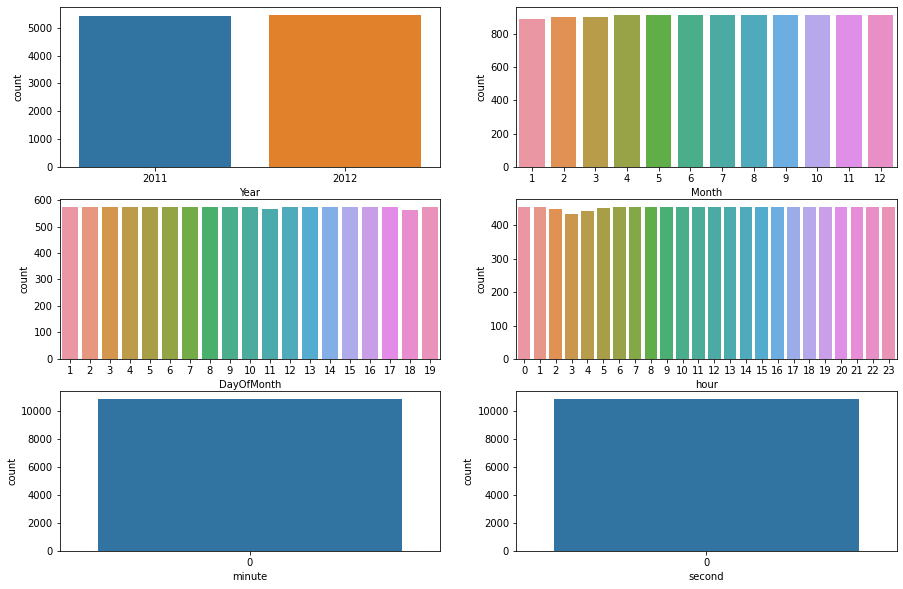

In [35]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)  
sns.countplot(x='Year', data=train)

plt.subplot(3, 2, 2)
sns.countplot(x='Month', data=train)

plt.subplot(3, 2, 3)  
sns.countplot(x='DayOfMonth', data=train)

plt.subplot(3, 2, 4) 
sns.countplot(x='hour', data=train)

plt.subplot(3, 2, 5)  
sns.countplot(x='minute', data=train)

plt.subplot(3, 2, 6) 
sns.countplot(x='second', data=train)
plt.show()

In [38]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'DayOfMonth', 'Month', 'Year', 'hour', 'minute', 'second'],
      dtype='object')

In [39]:
train

datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  DayOfMonth  \
0      14.395        81     0.0000       3          13     16           1   
1      13.635        80     0.0000       8          32     40           1   
2      13.635        80     0.0000       5          27     32           1   
3      14.395        75     0.0000       3          10     13           1   
4      14.395        75     0.0000       0           1      1           1   
...       ...       ...        ...     ...         ...    ...         ...   
10881  19.695        50    26.0027       7         329    336          19   
10882  17.425        57    15.0013      10         231    241          19   
10883  15.910        61    15.0013       4         164    168          19   
10884  17.425        61     6.0032      12         117    129          19   
10885  16.665        66     8.9981       4          84     88          19   

       Month  Year  hour  minute  second  
0          1  2011     0       0       0  
1          1  2011     1       0       0  
2          1  2011     2       0       0  
3          1  2011     3       0       0  
4          1  2011     4       0       0  
...      ...   ...   ...     ...     ...  
10881     12  2012    19       0       0  
10882     12  2012    20       0       0  
10883     12  2012    21       0       0  
10884     12  2012    22       0       0  
10885     12  2012    23       0       0  

[10886 rows x 18 columns]

In [40]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'DayOfMonth', 'Month', 'Year', 'hour', 'minute', 'second']]
y= train[['count']]

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=321)




In [46]:
reg = LinearRegression().fit(X_train, Y_train)

In [51]:
predictions=reg.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, predictions,squared=True)
rmse = mean_squared_error(Y_test, predictions,squared=False)
print(mse)
print(rmse)

20508.018317916107
143.20620907598982


In [59]:
X_test['temp']

10591    15.58
7267     22.14
5395      9.02
4325     22.14
7647     21.32
         ...  
3717     27.06
2792     27.06
1802     18.86
1463     18.86
7122     21.32
Name: temp, Length: 3593, dtype: float64

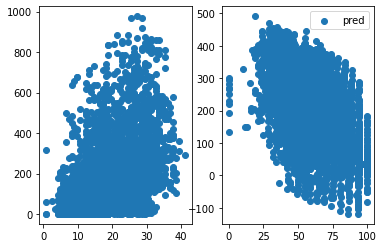

In [62]:
plt.subplot(1, 2, 1) 
plt.scatter(X_test['temp'], Y_test, label="true")
plt.subplot(1, 2, 2) 
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.legend()
plt.show()